# Lineare Regession und Overfitting

Hier untersuchen wir einen einfachen Datensatz zur Regression, und versuchen, uns einige Begriffe klar zu machen, insbesondere: 
- Zielfunktion 
- die Modellkomplexität
- das Rauschen 
- Menge der Verfügbaren Trainingsdaten

Zudem wollen wir beim Fitten herauszufinden, welche Art von Struktur der Fit-Algorithmus berücksichtigt. 

In [1]:
import sklearn
#Dieses Skript ist lauffähig unter sklearn Version 0.18.1
sklearn.__version__

'0.19.2'

In [2]:
#Wir importieren 
import numpy as np
import matplotlib.pyplot as plt
#seaborn enthält hübschere Defaults für Matplotlibplots etc.
import seaborn as sns
sns.set_color_codes('muted')
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
# Wir ziehen n_samples Datenpunkte
n_samples = 30


In [4]:
#Dies ist die Zielfunktion. Normalerweise ist sie nicht bekannt!
true_fun = lambda X: np.cos(1.5 * np.pi * X)

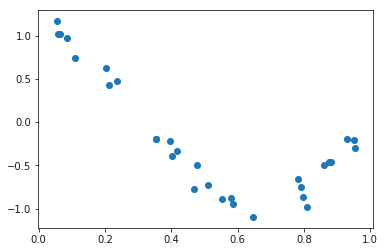

In [5]:
# Wieviel Rauschen sollen die Daten haben?
noise=0.1
X_train = np.sort(np.random.rand(n_samples,1))
y_train = true_fun(X_train) + np.random.randn(n_samples,1) * noise
plt.scatter(X_train,y_train);

## Lineare Regression

In [6]:
#Lineare Regression an die Daten (fit einer Geraden)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#Die Regressionskoeffizienten
linear_regression.coef_,linear_regression.intercept_

(array([[-1.70341372]]), array([0.67230354]))

In [8]:
X_test=np.linspace(0,1,101).reshape(-1,1)
y_test=true_fun(X_test)
yhat_test=linear_regression.predict(X_test)
mean_squared_error(y_test,yhat_test)

0.18703873896355327

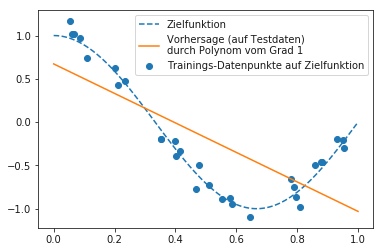

In [9]:
plt.scatter(X_train,y_train,label='Trainings-Datenpunkte auf Zielfunktion')
plt.plot(X_test,y_test,'--',label='Zielfunktion');
plt.plot(X_test,yhat_test,label='Vorhersage (auf Testdaten)\ndurch Polynom vom Grad 1');
plt.legend();

### PolynomialFeatures und Pipelines

Nun fitten wir Polynome höheren Grades an die Daten. 

#### PolynomialFeatures

In [10]:
# Nun wollen wir einen linearen Fit, aber nicht nur an das Feature x, sondern x,x^2,...,x^d
just_to_try_degree = 3
just_to_try_NSamples = 3
polynomial_features = PolynomialFeatures(degree=just_to_try_degree)
polynomial_features

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [11]:
# Was tut polynomial_features?
just_to_try_X=np.array(np.linspace(0,1,just_to_try_NSamples)).reshape(-1,1);

#für just_to_try_degree=3
polynomial_features.fit_transform(just_to_try_X)

array([[1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.5  , 0.25 , 0.125],
       [1.   , 1.   , 1.   , 1.   ]])

#### Pipelines

In [12]:
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

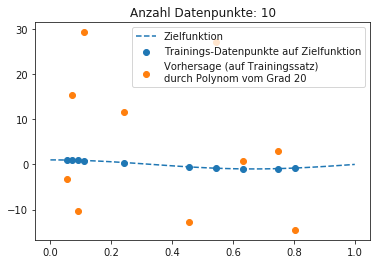

In [13]:
#Parameter: Bitte damit experimentieren!
#Insbesondere Werte 
noise=10.0
#(0,10),(1,10),(3,10),(8,10),(20,10) mit noise=0.0 und noise 0.3
just_to_try_degree = 20
just_to_try_NSamples = 10


#erstelle Trainingsdatensatz (in der Praxis oft teuer!)
just_to_try_X=np.random.rand(just_to_try_NSamples).reshape(-1,1)
just_to_try_y=true_fun(just_to_try_X) +\
    np.random.randn(just_to_try_NSamples,1) * noise


#Lerne das Modell
polynomial_features = PolynomialFeatures(degree=just_to_try_degree)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(just_to_try_X,just_to_try_y)
just_to_try_yhat=pipeline.predict(just_to_try_X)

#Plots
Xline=np.linspace(0,1,100)
yline=true_fun(Xline)
plt.plot(Xline,yline,'--',label='Zielfunktion')

plt.scatter(just_to_try_X,true_fun(just_to_try_X),label='Trainings-Datenpunkte auf Zielfunktion');
plt.scatter(just_to_try_X,just_to_try_yhat,label='Vorhersage (auf Trainingssatz)\ndurch Polynom vom Grad {0}'.format(just_to_try_degree));
plt.title('Anzahl Datenpunkte: {0}'.format(just_to_try_NSamples))
plt.legend();

In [14]:
just_to_try_X.shape,just_to_try_y.shape,X_test.shape

((10, 1), (10, 1), (101, 1))

# AUFGABE
Finden Sie Polynomgrade, welche ein Underfitting und ein Overfitting darstellen. Geben Sie auch Ihre persönliche optimale Wahl (dazwischen?) an.  

- Experimentieren Sie mit den Parametern in der folgenden Zelle. Wie hängen der Trainings- und Cross-Validation-Fehler von diesen Parametern ab?  
- Wagen Sie eine Verallgemeinerung Ihrer Befunde! Was könnten Sie z.B. für eine Klassifikationsaufgabe mit Entscheidungsbäumen bedeuten?  
- Wie verhalten sich der Ridge- und der Lasso-Regressor? Wie unterscheiden Sie sich vom normalen least-squares-Klassifikator? Finden Sie Parameterwerte, für welche Sie mit diesen Regressoren ebenfalls gute Resultate erhalten.


In [15]:

degrees = [1,2,10,200] #z.B. [1,2,3,10,200]

# Wie ist die Abhängigkeit vom Rauschen?
noise=0.1 #0.1

# Wir ziehen n_samples Datenpunkte
n_samples = 50  #20,200,2000

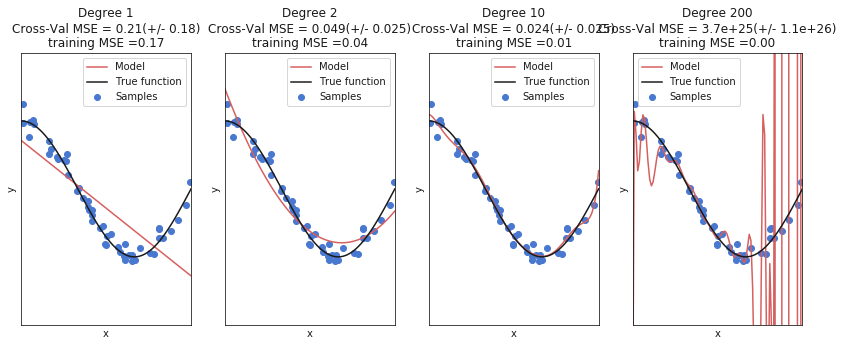

In [16]:
X_train = np.sort(np.random.rand(n_samples,1))
y_train = true_fun(X_train) + np.random.randn(n_samples,1) * noise

plt.figure(figsize=(14, 5))
X_test = np.linspace(0, 1, 100).reshape(-1,1)
y_test = true_fun(X_test)
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    #regressor = Ridge(alpha=)
    #regressor = Lasso(alpha=)
    regressor = LinearRegression()
    
    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", regressor)])
    pipeline.fit(X_train, y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
    train_score = mean_squared_error(y_train,pipeline.predict(X_train))

    plt.scatter(X_train, y_train,c='b', label="Samples")
    plt.plot(X_test, pipeline.predict(X_test), c='r', label="Model")
    plt.plot(X_test, y_test,c='k', label="True function")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nCross-Val MSE = {:.2g}(+/- {:.2g})\ntraining MSE ={:.2f}".format(
        degrees[i], -scores.mean(), scores.std(),train_score))
plt.show()

Quelle: Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html